In [56]:
import numpy as np
from skimage import io, data, transform, util, filters, color, exposure, restoration, measure, feature
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_float64, img_as_ubyte
from scipy import ndimage, fft
import math

In [57]:
def show(img_list, caption_list, Axis=False, rescale = True):
    n = len(img_list)
    f, ax = plt.subplots(1,n, figsize=(10+5*(n-1),10))
    for i in range(n):
        if rescale:
            ax[i].imshow(img_list[i], cmap='gray')
        else:
            if np.max(img_list[i]) <= 1:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=1)
            else:
                ax[i].imshow(img_list[i], cmap='gray', vmin=0, vmax=255)
        ax[i].set_title(caption_list[i])
        if not Axis:
            ax[i].set_axis_off()

# Machine Learning

In [58]:
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets, preprocessing, metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


## Base de datos Iris


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flores_de_%C3%8Dris.png/1200px-Flores_de_%C3%8Dris.png" alt="Drawing"  width="900"/>


<ul>
    <li>50 exemplos de 3 diferentes especies de flores de iris</li>
    <li>Medidas:  largura e comprimento das sépalas e pétalas, em centímetros </li>
</ul>

## Carregando a base Iris

In [59]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [60]:
print(f'Informações presentes no dataset: {iris.keys()}')
print(f'Atributos do conjunto de dados: {iris.feature_names}')
print(f'Nomes das classes: {iris.target_names}')
print(f'Tamanho dos dados: {iris.data.shape}')
print(f'Tamanho das etiquetas: {iris.target.shape}')

Informações presentes no dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Atributos do conjunto de dados: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Nomes das classes: ['setosa' 'versicolor' 'virginica']
Tamanho dos dados: (150, 4)
Tamanho das etiquetas: (150,)


In [61]:
def scatter_iris(X, Y, x_label = 'X1', y_label = 'Y1'):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel(x_label, fontsize = 15)
    ax.set_ylabel(y_label, fontsize = 15)
    ax.set_title('Scatter')

    targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['r', 'g', 'b']
    markers = ['+', 'o', 'd']

    for i, (marker, target, color) in enumerate(zip(markers, targets, colors)):
        ind = Y == i
        ax.scatter(X[ind,0], X[ind,1], c = color, s = 50, marker = marker)
    
    ax.legend(targets)
    ax.grid()

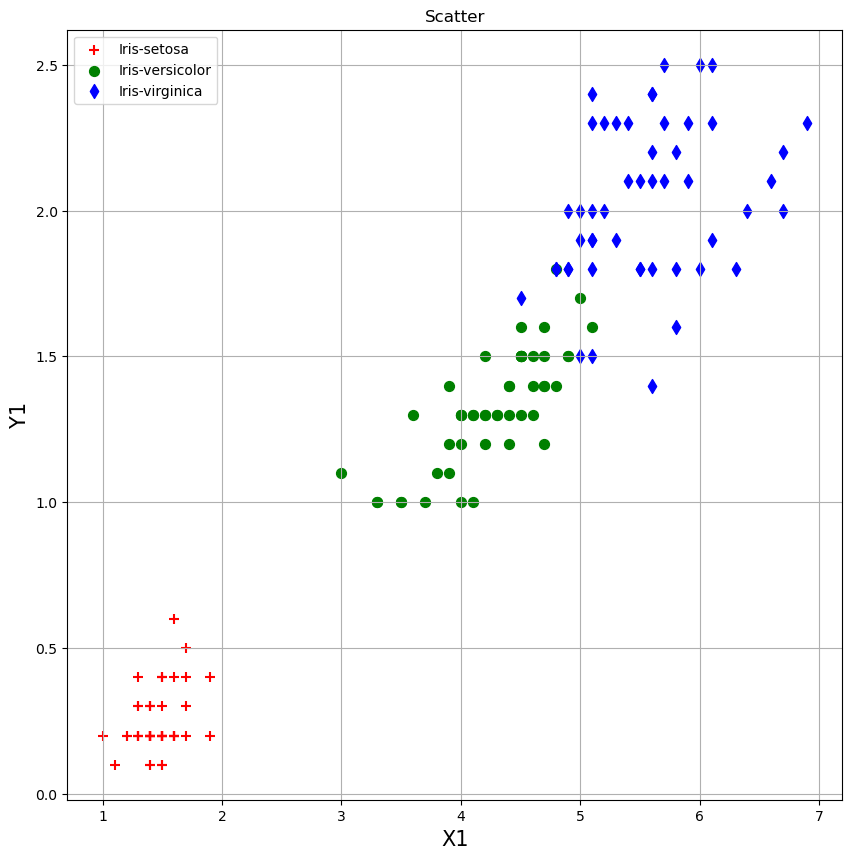

In [62]:
scatter_iris(X[:,2:], Y)

# PCA

In [63]:
pca = PCA(n_components=2)
pca.fit(X)
nX = pca.transform(X)
print(nX.shape)

(150, 2)


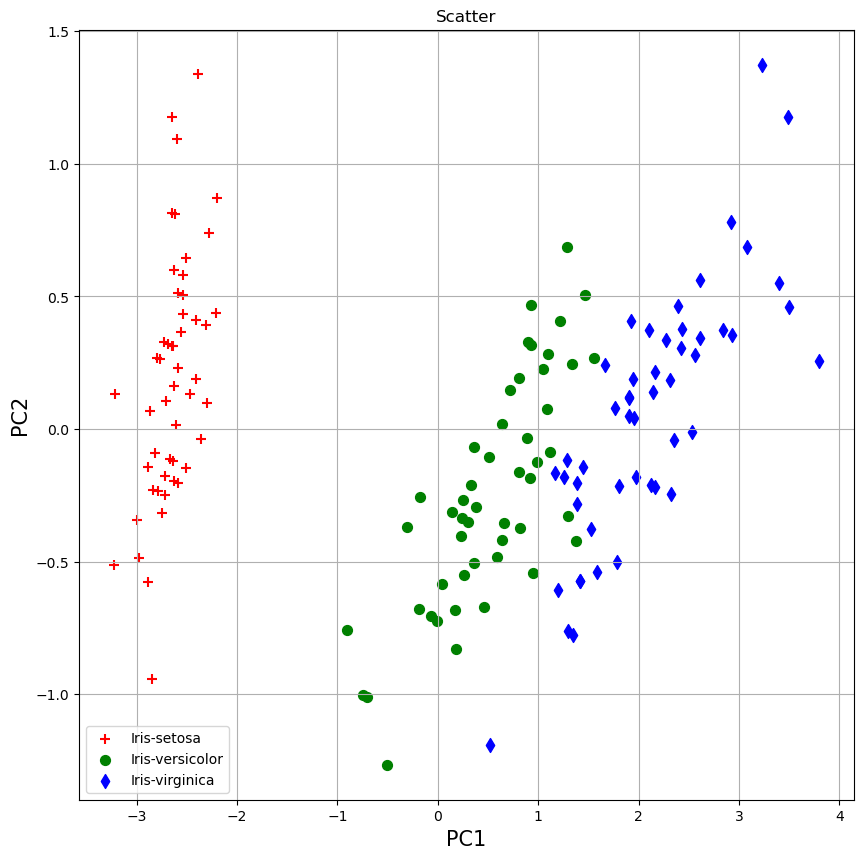

In [64]:
scatter_iris(nX, Y, 'PC1', 'PC2')

## Terminología Machine Learning

<ul>
  <li>Cada linha é uma observação (também conhecida como: amostra, exemplo, instância, registro - <i> sample, example, instance, record</i>)</li>
  <li>Cada coluna é um característica (também conhecido como: preditor, atributo, variável independente, entrada, regressor, covariável - <i>predictor, attribute, independent variable, input, regressor, covariate</i>)</li>
</ul>

## Requisitos para trabalhar com dados no scikit-learn
<ul>
  <li>Características (atributos) e etiquetas são objetos separados</li>
  <li>As características e etiquetas devem ser numéricos</li>
  <li>As características e etiquetas devem ser matrizes NumPy</li>
  <li>As características e etiquetas devem ter formas específicas</li>
</ul>

## Padrão de modelagem de 4 etapas scikit-learn

<b>Passo 1</b>: importe a classe que você planeja usar

In [65]:
# Passo 1
from sklearn import svm

<b>Passo 2</b>: "Instanciar" o "estimador"
<ul>
  <li>"Estimator" é o termo do scikit-learn para modelo</li>
  <li>"Instanciar" significa "criar uma instância de"</li>

</ul>

In [66]:
clf_svm = svm.SVC(C=2, kernel='linear')

<ul>
  <li>O nome do objeto não importa</li>
  <li>Pode especificar parâmetros de ajuste (também conhecidos como "hiperparâmetros") durante esta etapa</li>
  <li>Todos os parâmetros não especificados são definidos para seus padrões</li>

</ul>

In [24]:
# mostrando informações do modelo
print(clf_svm)

SVC(C=2, kernel='linear')


<b>Passo 3</b>: ajustar o modelo com os dados (também conhecido como "treinamento de modelo")
<ul>
  <li>O modelo está aprendendo a relação entre $X$ e $y$</li>
  <li>O treino acontece no proprio objeto</li>
</ul>

In [67]:
# características
X = iris.data

# etiquetas
y = iris.target

clf_svm.fit(X, y)

SVC(C=2, kernel='linear')

<b>Passo 4</b>: predizer a resposta para uma nova observação
<ul>
  <li>Novas observações são chamadas de dados "fora da amostra"</li>
  <li>Usa as informações que aprendeu durante o processo de treinamento do modelo</li>
</ul>

In [26]:
clf_svm.predict([[3, 5, 4, 2]])

array([1])

<p> Segundo o classificador, o dado fornecido pertence à segunda classe </p>

# Processamentos dos dados
## Normalizar os dados

<p>O objetivo da normalização é alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

* Normalização
$$X_{new} = \frac{ X - X_{min} }{ X_{max} - X_{min} }$$

* Padronização
$$X_{changed} = \frac{ X - \mu }{ \sigma } $$
Importando o módulo de preprocessamento</p>

In [68]:
def NormalizaMinMax(X):
    _min = np.min(X, axis=0, keepdims=True)
    nX = X - _min
    _max = np.max(nX, axis=0, keepdims=True)
    nX = nX / _max
    return nX

### Biblioteca de preprocessamento

In [69]:
from sklearn import preprocessing

<p>Normalizando e padronizando os dados da base Iris</p>

In [29]:
# Normalizando pelo mínimo e máximo usado a função do sklearn
#nX = preprocessing.MinMaxScaler().fit_transform(X)
minmax_scaler = preprocessing.MinMaxScaler().fit(X)
nX = minmax_scaler.transform(X)

# Normalizando pelo mínimo e máximo usado a própria implementação
nX2 = NormalizaMinMax(X)

print(f'Dados originais:\n {X[0:2, :]}')
print(f'Dados normalizados sklearn:\n {nX[0:2, :]}')
print(f'Dados normalizados própria:\n {nX2[0:2, :]}')



Dados originais:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
Dados normalizados sklearn:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]]
Dados normalizados própria:
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]]


### Normalização dos dados da base Iris

In [70]:
# normalização da base Iris
#X_new = preprocessing.MinMaxScaler().fit_transform(X)
minmax_scaler = preprocessing.MinMaxScaler().fit(X)
X_new = minmax_scaler.transform(X)

# padronização da base Iris
std_scaler = preprocessing.StandardScaler().fit(X)
X_changed = std_scaler.transform(X)

### Divisão dos dados nos subconjuntos para treino e teste

In [71]:
x_train, x_test, y_train, y_test = train_test_split(nX, Y, test_size=0.2)

print(f'Tamanho conjunto de treino:\n{x_train.shape}')
print(f'Tamanho conjunto de teste:\n{x_test.shape}')
print(f'Tamanho etiquetas de treino:\n{y_train.shape}')
print(f'Tamanho etiquetas de treino:\n{y_test.shape}')

Tamanho conjunto de treino:
(120, 2)
Tamanho conjunto de teste:
(30, 2)
Tamanho etiquetas de treino:
(120,)
Tamanho etiquetas de treino:
(30,)


### Instanciação do classificador, treinamento e predição

In [72]:
# instanciação do classificador
clf1 = svm.LinearSVC(penalty='l2', dual=False)
# treino
clf1.fit(x_train, y_train)
# teste
y_preds = clf1.predict(x_test)
print(f'Acurácia macro: {np.sum(y_preds == y_test)/ y_test.size}')
# Avaliação do modelo usando as funções avaliaçõ do sklearn
print('Classifier metrics on test set')
print(f'Accurancy: {metrics.accuracy_score(y_test, y_preds)*100:.2f}%')
print(f"Precision: {metrics.precision_score(y_test, y_preds, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_preds, average='micro')}")
print(f"F1: {metrics.f1_score(y_test, y_preds, average='micro')}")
print(f"Precision: {metrics.precision_score(y_test, y_preds, average=None)}")
print(f"Recall: {metrics.recall_score(y_test, y_preds, average=None)}")
print(f"F1: {metrics.f1_score(y_test, y_preds, average=None)}")

Acurácia macro: 0.9666666666666667
Classifier metrics on test set
Accurancy: 96.67%
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1: 0.9666666666666667
Precision: [1.  1.  0.9]
Recall: [1.   0.92 1.  ]
F1: [1.   0.96 0.95]


In [74]:
m = metrics.confusion_matrix(y_test, y_preds)
print(m)
tot = np.sum(m, axis=1, keepdims=True) 
print(tot)
print(m/tot)

[[ 8  0  0]
 [ 0 12  1]
 [ 0  0  9]]
[[ 8]
 [13]
 [ 9]]
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.   1.  ]]


## Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score

In [75]:
# Validação cruzada com 5 folds
clf1 = svm.LinearSVC(penalty='l2', dual=False)
folds = cross_val_score(clf1, X, Y, cv = 5)
print(folds)
print(f'Tasa de acierto: {np.mean(folds)}')

[1.   1.   0.93 0.9  1.  ]
Tasa de acierto: 0.9666666666666668


# Avaliação usando Random Forest

In [76]:
clfR = RandomForestClassifier(max_depth = 2, random_state = 0)
clfR.fit(x_train, y_train)
pred = clfR.predict(x_test)

# Cálculo da matriz de confusão
m = metrics.confusion_matrix(y_test, pred)
tot = np.sum(m, axis=1, keepdims=True) 
print(m/tot)
np.set_printoptions(precision=2)

[[1.   0.   0.  ]
 [0.   0.69 0.31]
 [0.   0.22 0.78]]


### Validação cruzada usando Random Forest

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
clfR = RandomForestClassifier(max_depth = 2, random_state = 0)
folds = cross_val_score(clfR, X, Y, cv = 5)
print(folds)
print(f'Tasa de acierto: {np.mean(folds)}')

[0.97 0.97 0.93 0.9  1.  ]
Tasa de acierto: 0.9533333333333334
